# Tools and Examples \- Part 1

## Assigning monomials to receptor model states and transitions

The notebook  in `receptor_tools.ipynb` \(see Appendix\) contains function definitions that will prove useful as we further explore receptor modeling.  The command `%run receptor_tools.ipynb` loads these function definitions, and the remainder of this notebook illustrates how to use some of them.  The focus is on tools that assign monomials to receptor model states and transitions \(i.e., graph vertices and edges\).  Doing this makes the structure of a receptor model easier to understand.  It also facilitates symbolic calculations that begin with the state\-transition diagram of a receptor model.


In [18]:
%%capture
%run receptor_tools.ipynb

To begin we specify the states and transitions of a receptor model as an undirected graph. For simplicity, we will use a four\-state model with one cycle.



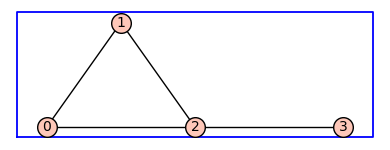

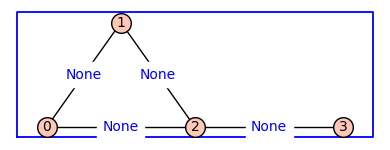

In [19]:
pos = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (4,0)} # vertex positions
G = Graph({0: [1, 2], 1: [2], 2: [3]},pos=pos)

G.show(figsize=4,graph_border=True)
G.show(figsize=4,graph_border=True,edge_labels=True)

By default the vertices are `integers` and the edge labels are `None`.   The method `show()` has a named parameter `edge_lablels` that is set to `False` by default (above left). To see the edge labels we repeat the `show()` command using `edge_labels=True`.

## print_graph

The first function we will illustrate is `print_graph`. On the next line, the command `mydoc(print_graph)` provides information about the usage.   As advertized, he command `print_graph(G)` gives a list of the vertices and edges of `G`.

In [20]:
mydoc(print_graph)

**`print_graph(G)`**

Prints the vertices and edges of the graph `G`.
    

In [21]:
print_graph(G)

vertices: [0, 1, 2, 3]
edges: [(0, 1, None), (0, 2, None), (1, 2, None), (2, 3, None)]


## add_vertex_monomials 

The next function we will illustrate is `add_vertex_monomials`.

In [22]:
mydoc(add_vertex_monomials)

**`add_vertex_monomials(G=Graph on 0 vertices, method='integer', ring=False)`**

Add monomials to vertices of a graph. 

The add_vertex_monomials function takes a graph G, as well as optional parameters method and ring. The function creates a new graph H with vertices labeled by monomials. The monomials are chosen based on the number of vertices in G. If the method parameter is set to 'alpha' and the number of vertices in G is less than or equal to 10, the monomials are chosen as alphabetical letters ('a' to 'k'). Otherwise, the monomials are chosen as strings of the form 'a0', 'a1', ..., 'an-1', where n is the number of vertices in G. The function then adds the vertices from G to H using the monomials as labels, and adds the edges from G to H using the monomials as endpoints. If the ring parameter is set to True, the function also creates a polynomial ring V with the chosen monomials and 'invlex' order, and returns both H and V. Otherwise, it returns only H.

INPUT:

- ``G`` -- graph object (default: `Graph()`);

- ``method`` -- integer (default: ``integer``);

OUTPUT: 

- The graph with monomials as vertices

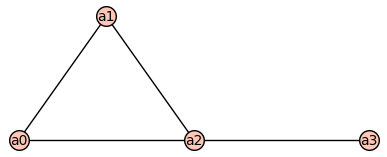

In [23]:
H=add_vertex_monomials(G)
H.show(figsize=4)

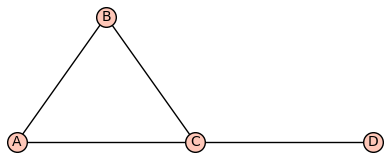

In [24]:
H2=add_vertex_monomials(G,method='alpha')
H2.show(figsize=4)

## add_edge_monomials()

In [25]:
mydoc(add_edge_monomials)

**`add_edge_monomials(G0, method='integer', edge_vars=['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], ring=False, short_name=False)`**

Add monomials to edges of a graph.

The add_edge_monomials function takes a graph G, as well as optional parameters method, edge_vars, ring, and short_name. If method is set to 'integer', the function creates a polynomial ring using the given edge variables and assigns variables to the edges of the graph. The edge variables can be represented either as 'e' followed by the first vertex label or the first and second vertex labels concatenated. If the vertex labels are integers and the short_name parameter is set to True, the edge variables are created using only the first vertex label. If method is set to 'alpha', the function creates a polynomial ring using the given edge variables and assigns variables to the edges of the graph in reverse order. The number of edge variables used is determined by the size of the graph. The ring parameter, if set to True, injects the polynomial variables into the global namespace and returns the graph and the polynomial ring. Otherwise, it simply returns the graph.

INPUT:

- ``G`` -- graph object (default: `Graph()`);

- ``method`` -- integer (default: ``integer``);

OUTPUT: 

- The graph with monomials as edges

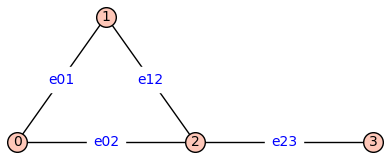

In [26]:
H3=add_edge_monomials(G)
H3.show(figsize=4,edge_labels=True)

The function `add_edge_monomials()`also works when vertices are variables from a polynomial ring.



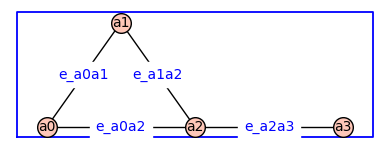

In [27]:
H4=add_edge_monomials(H)
H4.show(figsize=4,graph_border=True,edge_labels=True)

Using `method='alpha'` in `add_edge_monomials()` creates simpler edge labels

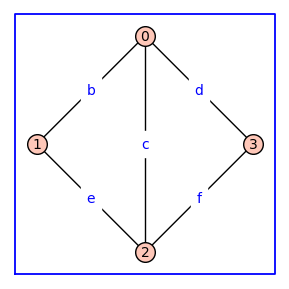

In [28]:
G = graphs.CycleGraph(4); G.add_edge(0,2)
G = add_edge_monomials(G,method='alpha')
G.show(figsize=4,graph_border=True,edge_labels=True)

Using `ring=True` in `add_vertex_monomials()` constructs a polynomial ring over the variables that label the vertices

In [29]:
(G,V) = add_vertex_monomials(graphs.HouseGraph(),ring=True)
show(V)

Multivariate Polynomial Ring in a0, a1, a2, a3, a4 over Integer Ring

In [30]:
V.inject_variables()
fv = (a0+a1)*(a0+a3+a4)^2
print(fv)

Defining a0, a1, a2, a3, a4
a1*a4^2 + a0*a4^2 + 2*a1*a3*a4 + 2*a0*a3*a4 + 2*a0*a1*a4 + 2*a0^2*a4 + a1*a3^2 + a0*a3^2 + 2*a0*a1*a3 + 2*a0^2*a3 + a0^2*a1 + a0^3


Using `ring=True` in `add_edge_monomials()` constructs a polynomial ring over the variables that label the edges

Multivariate Polynomial Ring in b, c, d, e, f, g over Integer Ring

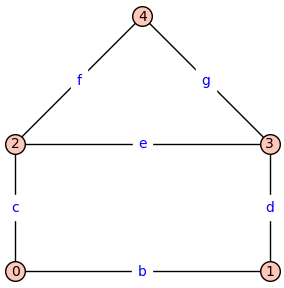

In [31]:
(G,E) = add_edge_monomials(graphs.HouseGraph(),method='alpha',ring=True)
show(E)
G.show(figsize=4,edge_labels=True)

In [32]:
E.inject_variables()
fe = (b+c)*(b+e+f)^2
print(fe)

Defining b, c, d, e, f, g
c*f^2 + b*f^2 + 2*c*e*f + 2*b*e*f + 2*b*c*f + 2*b^2*f + c*e^2 + b*e^2 + 2*b*c*e + 2*b^2*e + b^2*c + b^3
